# 01 - NMF experiments on Zeisel

* nimfa installed with `pip`

In [14]:
import nimfa as n
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF

In [213]:
zeisel_path = '/media/tmo/data/work/datasets/zeisel/expression_sara_filtered.txt'
zeisel_meta_path = '/media/tmo/data/work/datasets/zeisel/expression_mRNA_17-Aug-2014.txt'

In [3]:
%%time
zeisel_df = pd.read_csv(zeisel_path, sep='\t', skiprows=1, header=None, index_col=0)
zeisel_df.index.name = 'gene'

CPU times: user 4.36 s, sys: 378 ms, total: 4.74 s
Wall time: 4.74 s


In [238]:
del zeisel_meta_df

In [252]:
zeisel_meta_df = pd.read_table(zeisel_meta_path, nrows=12, index_col=1, header=None)
zeisel_meta_df.drop(zeisel_meta_df.columns[0], axis=1, inplace=True)
zeisel_meta_df = zeisel_meta_df.T.reset_index()[['tissue', 'level1class', 'level2class']]
zeisel_meta_df.index.name = 'cell'

In [259]:
for meta_col in zeisel_meta_df.columns:
    zeisel_meta_df[meta_col] = zeisel_meta_df[meta_col].astype('category')

In [260]:
zeisel_meta_df.head()

1,tissue,level1class,level2class
cell,,,
0,sscortex,interneurons,Int10
1,sscortex,interneurons,Int10
2,sscortex,interneurons,Int6
3,sscortex,interneurons,Int10
4,sscortex,interneurons,Int9


In [74]:
genes = zeisel_df.index

In [43]:
zeisel_m = zeisel_df.as_matrix()

In [44]:
zeisel_m.shape

(13063, 3005)

In [45]:
np.sum(np.sum(zeisel_m, axis=0) < 95)

0

In [134]:
model = NMF(n_components=25, init='nndsvd', random_state=42, verbose=True)
model

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=25, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=True)

In [ ]:
%%time
W = model.fit_transform(zeisel_m) # basis matrix
H = model.components_             # mixture matrix

In [196]:
model_02 = NMF(n_components=10, init='nndsvd', random_state=42, verbose=True, alpha=5)
model_02

NMF(alpha=5, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=True)

In [197]:
%%time
W_02 = model_02.fit_transform(zeisel_m) # basis matrix
H_02 = model_02.components_             # mixture matrix

In [138]:
W.shape

(13063, 25)

In [139]:
H.shape

(25, 3005)

In [140]:
max_w = np.max(W, axis=0)
max_w.sort()

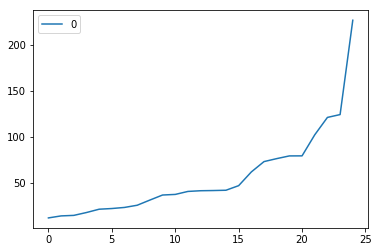

In [141]:
pd.DataFrame(max_w).plot()
plt.show()

In [60]:
sum_w = np.sum(W, axis=0)
sum_w.sort()

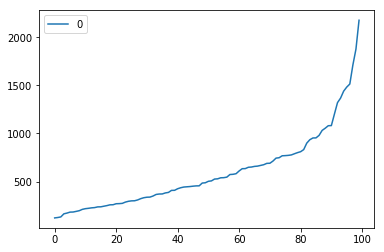

In [61]:
pd.DataFrame(sum_w).plot()
plt.show()

In [82]:
W[:, 0]

13063

In [105]:
np.argsort(W[:, 0])[::-1]

array([3250, 7548, 3163, ..., 8546, 8545,    0])

In [111]:
W[:, 1]

array([ 0.        ,  0.        ,  0.        , ...,  0.00271542,
        0.        ,  0.        ])

In [122]:
genes[np.argsort(W[:, 0])[::-1]][:100]

Index(['Malat1', 'Son', 'Cd81', 'Syt11', 'Pcdh9', '2900097C17Rik', 'Hnrnpa2b1',
       'Gas5', 'Tmem50a', 'Selk', 'Sec62', 'Hmgcs1', 'Eif4a1', 'Ddx5',
       'Atp6v1g1', 'Pcbp4', 'Rps18', 'Eif4g3', 'Erh', 'Rbm39', 'Rps29', 'Safb',
       'Srsf7', 'Polr2g', 'Ndufb10', 'Rpl35', 'Snord104', 'Ddx1', 'Ptprd',
       'Eif2s2', 'Hnrnpk', 'Snrnp70', 'Ndufa6', 'Tra2b', 'Agrn', 'Sf3b1',
       'Ndufb11', 'Ogt', 'Map1lc3b', 'Kcna1', 'Nf2', 'Dgkz', 'Myl6',
       'C1galt1c1', 'Nbea', 'Cdc42se2', 'Bcap31', 'Prex1', 'Slc39a7', 'Hnrnpl',
       'Pfdn5', 'Zfp740', 'Ist1', 'Chd6', 'Mrpl18', 'Gpatch8', 'Sec11a',
       'Mon2', 'Snhg9', 'Gria2', 'Ptk2', 'Degs1', 'Sel1l', 'Ankib1',
       '6820431F20Rik', 'Clk4', 'Psmc4', 'Rps3', 'Acap2', 'Dhrs7', 'Prpf40a',
       'Clasrp', 'Rpl37a', 'Cwc22', 'Psmc3', 'Fis1', 'Cnot4', 'D5Ertd579e',
       'Isca2', 'Atxn7l3b', 'Tmem30a', 'Dhx30', 'Cdk9', 'U2surp', 'Tmem87a',
       'D8Ertd738e', 'Mrps33', 'Ddx24', 'Tmem181c-ps', 'Ttc14', 'Zfp280c',
       'Ndufa13', 'Zran

In [166]:
genes[np.argsort(W_02[:, 0])[::-1]][:100]

Index(['Malat1', 'H3f3b', 'Mog', 'Cox7c', 'Ddx5', 'Cd81', 'Enpp2', 'Slc25a4',
       'Sc4mol', 'Ptn', 'Cd9', 'Cox6c', 'Uqcrh', 'Xist', 'Cycs', 'Gm9846',
       'Ndufa4', 'Jun', 'Ywhaq', 'Cox8a', 'Uqcrq', 'Pcdh9', 'Rpl35', 'Myl6',
       'Tecr', 'Cox6b1', 'Hsp90ab1', 'Opalin', 'Ermn', 'Vmp1', 'Eif4a1',
       'Atp5e', 'Selk', 'Son', 'Shfm1', 'Atp5k', 'Cryab', 'Psmb1', 'Rpl34-ps1',
       'Atp1a2', 'Omg', 'Hmgb1', 'Rpl41', '2010107E04Rik', 'Atp5j2', 'Ctsl',
       'Spcs1', 'Rps18', 'Eif2s2', 'Lars2', 'Rnf13', 'Ndufc1', 'Mat2a',
       'Tmem50a', 'Rpl7', 'Atp5o', 'Atp5f1', 'Ubc', 'Rbm39', 'Gas5', 'Ndufb11',
       'Rpl32', 'Rps6', 'Uqcr11', 'Ndufa13', 'Atp5j', 'Cox7a2', 'Slc38a2',
       'Uqcr10', 'Sumo1', 'Usmg5', 'Sub1', 'Mrps33', 'Myeov2', 'Hnrnpk',
       'Ndufa6', 'Eif3k', 'Rps9', 'Rpl18a', 'Rps28', 'Prdx6', 'Degs1',
       'D8Ertd738e', 'Hnrnpa2b1', 'Mobp', 'Sec61g', 'Tmed10', 'Hmgcr',
       'Lrpap1', 'Sept4', 'Ptprd', 'Atp5c1', 'Commd6', 'Fdft1', 'Erh',
       'Snord104', 'Deb1', 

In [133]:
genes[np.argsort(W[:, 7])[::-1]][:100]

Index(['Npy', 'Crhbp', 'Ppia', 'Resp18', 'Scg2', 'Ptn', 'Zwint', 'Scg5',
       'Stmn2', 'Tuba1a', 'Ngfrap1', 'Eif4a2', 'Hsp90ab1', 'Slc25a4', 'Aldoa',
       'Cox7b', 'Cox8a', 'Myl12b', 'Snurf', 'Mdh1', 'Fxyd6', 'Uqcrh',
       'Arl6ip1', 'Gap43', 'Cst3', 'Stmn3', 'Pde1a', 'Fau', 'Uchl1', 'Actg1',
       'Atp6v0c-ps2', 'Serinc1', 'Rpl4', 'Mif', 'Ndufa4', 'Gm5506_loc1',
       'Tuba1b', 'Atp6v0b', 'Zcchc12', 'Hsp90aa1', 'Nap1l5', 'Rnasek', 'Uqcrq',
       'Snhg11', 'Gm15421', 'Pgrmc1', 'Rtn1', 'Cox4i1', 'Atp1b1', 'Acot7',
       'Actb', 'Cox6b1', 'Rps3a1', 'Lrpap1', 'Tecr', 'Morf4l2', 'Ldha', 'Gad2',
       'Rpl13a', 'Bex4', 'Higd1a', 'Rps6', 'Lgals1', 'Atp5o', 'Slc7a3', 'Sod1',
       'Ndufa11', '2010107E04Rik', 'Ndufa1', 'Akr1a1', 'Atp6v1e1', 'Oaz1-ps',
       'Ldhb', 'Gm6654', 'Rplp1', 'Ndufv3', 'Myl6', 'Tspan7', 'Vdac3', 'Nme2',
       'Rab6a', 'Ndufa13', 'Usmg5', 'Uqcr10', 'Hspe1', 'Napb', 'Rtn3',
       'Atp6v1a', 'Gpx4', 'Rps28', 'Syt11', 'Erp29', 'Gabarapl2', 'Fis1',
       'Ra

In [104]:
genes[np.nonzero(np.argsort(W[:, 3])[:])][:100]

Index(['Tspan12', 'Tshz1', 'Fnbp1l', 'Adamts15', 'Cldn12', 'Rxfp1',
       '2310042E22Rik', 'Sema3c', 'Jam2', 'Apbb1ip', 'Frem2', 'BC005764',
       'Deptor', 'C130030K03Rik', 'Klhl13', 'Tnfaip8l3', 'Ascl1', 'Atp1b2',
       'Tmem132e', 'Prkar2b', 'Necab1', 'Nr2f2', 'Stmn1-rs1', 'Shisa9', 'Sub1',
       'Vat1l', 'Pcdh18', 'Dpysl5', 'Cxcl14', 'Ptprf', 'Cers5', 'Nacc2',
       'Cntnap2', 'Asic4', 'Tph2', 'Rit2', 'Scg2', 'Nr2e1', 'Bmp3', 'B3galnt1',
       'Gm9846', 'Kcnn1', 'Fam19a2', 'Samd4', 'Stmn1', 'Egln3', 'Bmper',
       'Cd200', '1810041L15Rik', 'Rnf128', 'P2ry1', 'Sorcs1', 'Htr3a',
       'Kcnip1', 'Sco2', '2610044O15Rik8', 'Tmem41b', 'Cdh9', 'Ppp2r3d',
       'Usp28', 'Trib2', 'L2hgdh', 'Cited2', 'Btbd11', 'Rgs12', 'Cnr1',
       'Kcnd3', 'Htr3b', 'Sulf2', 'Capn5', 'Osbpl5', 'Nrtn', 'Nr2f1',
       'Galnt14', 'Slc35f1', 'Mmgt1', 'Htr7', 'E130309F12Rik', 'Wtap',
       'Racgap1', 'Arhgap24', 'Maml3', 'Gng2', 'Tnc', 'Fndc3a', 'Npas3',
       'Celf6', 'Inpp4b', 'Npas1', 'Ache', 'Cl

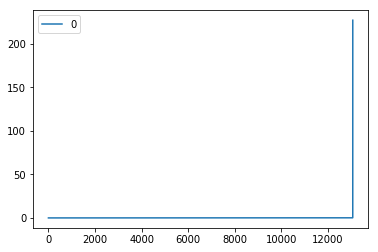

In [63]:
pd.DataFrame(sorted(W[:, 0])).plot()
plt.show()

In [56]:
np.sum(W.astype(bool), axis=0)

array([ 713, 5053, 6741, 3230, 3335, 6572, 7674, 5497, 5784, 6400, 3471,
       5185, 7844, 5575, 3655, 6515, 5771, 2352, 3687, 6294, 7464, 8755,
       2421, 5514, 4487, 7969, 3282, 5203, 3158, 3700, 5091, 5412, 4304,
       1750, 4560, 4942, 7542, 4233, 7989, 4473, 8606, 7630, 7070, 4081,
       4720, 8055, 4062, 2331, 1408, 6996, 5604, 6388, 1919, 1585, 5951,
       6055, 5152, 5404, 4967, 5194, 5267, 6228, 3095, 6957, 6294, 5029,
       3993, 4656, 5694, 2890, 7145, 7170, 3753, 3588, 3108, 3517, 3358,
       3768, 3226, 6362, 2960, 4772, 2820, 4816, 5685, 6481, 7669, 3220,
       5919, 4922, 4793, 7072, 7816, 2078, 6887, 3184, 4780, 8318, 4098,
       5409])

In [159]:
from numpy import ma

log_H = 

/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


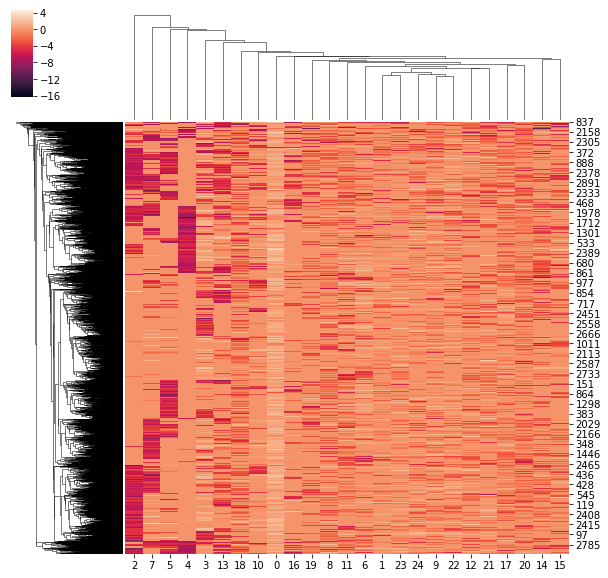

In [191]:
sns.clustermap(ma.filled(np.log(ma.masked_equal(H, 0)).T, 0))
plt.show()

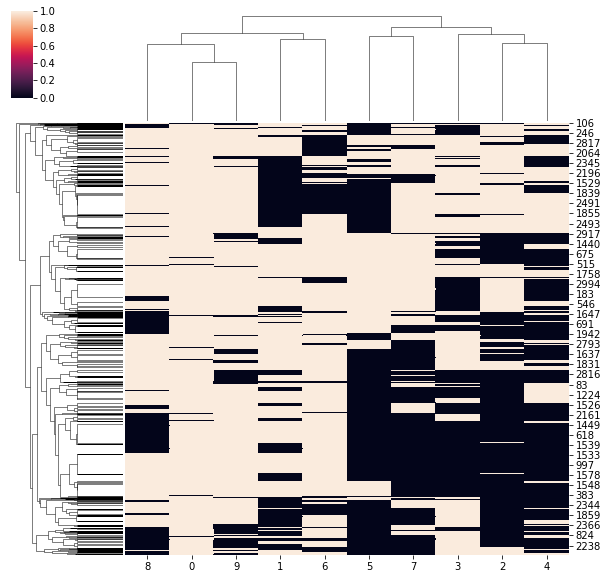

In [198]:
# fig, ax = plt.subplots(figsize=(12,24))
sns.clustermap((H_02 > 0).T, vmin=0, vmax=1)
plt.show()

In [207]:
from sklearn.manifold import TSNE

tsne_df = pd.DataFrame(TSNE().fit_transform(H_02.T))

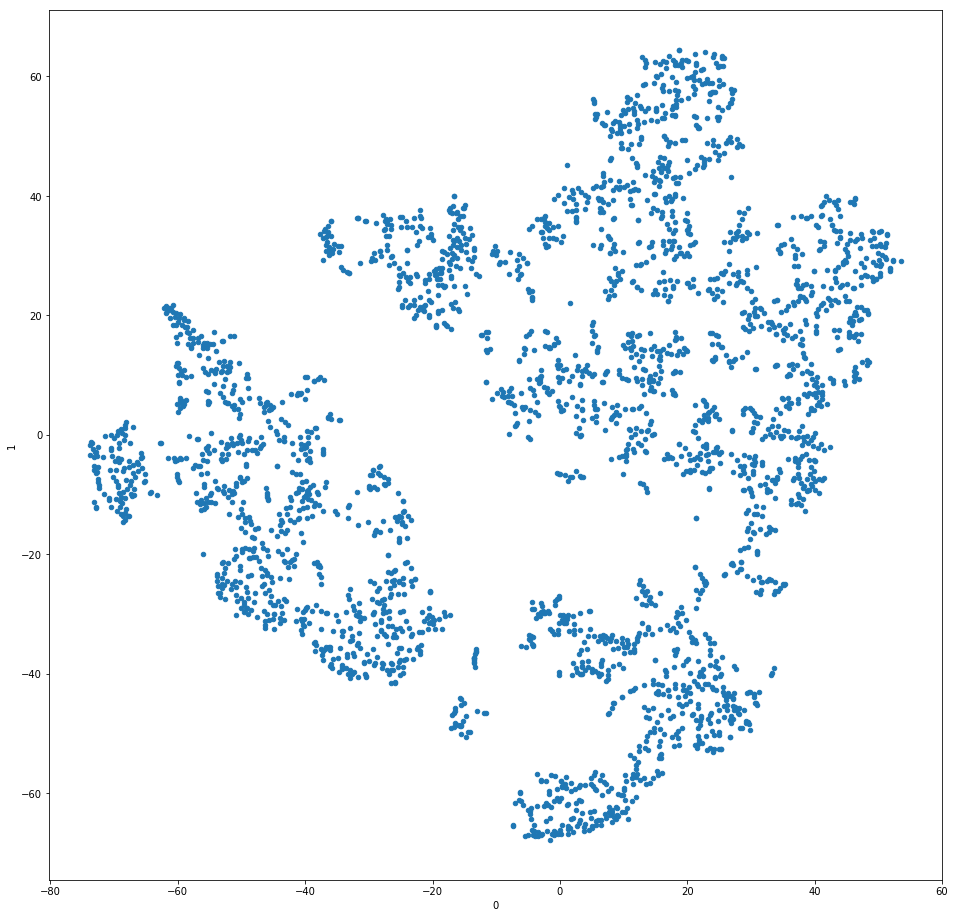

In [211]:
tsne_df.plot.scatter(x=0, y=1, figsize=(16,16))
plt.show()

In [256]:
%%time
from sklearn.manifold import TSNE

embedding_df = pd.DataFrame(TSNE().fit_transform(H.T))

CPU times: user 1min 2s, sys: 15 s, total: 1min 16s
Wall time: 1min 16s


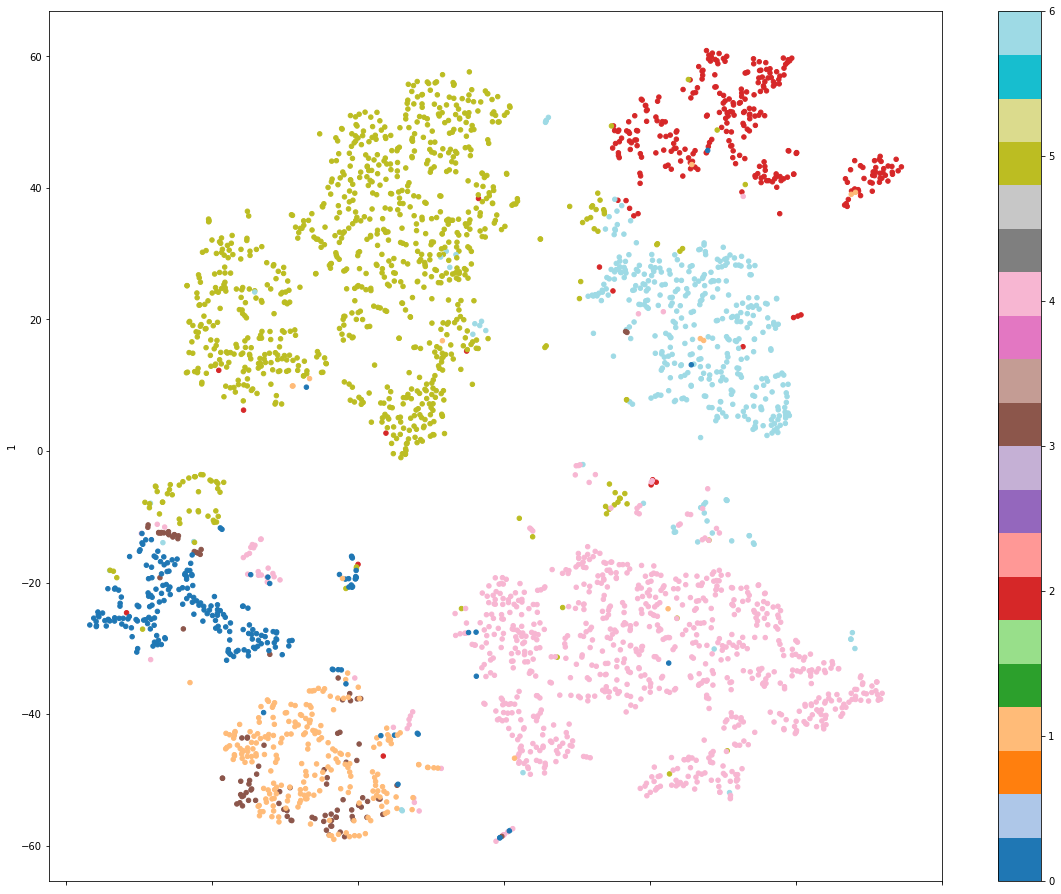

In [268]:
embedding_df.plot.scatter(x=0, y=1, c=zeisel_meta_df['level1class'].cat.codes, cmap=plt.cm.get_cmap('tab20'), figsize=(20,16))
plt.show()

In [269]:
%%time
from sklearn.manifold import TSNE

embedding_df = pd.DataFrame(TSNE().fit_transform(H_02.T))

CPU times: user 58.4 s, sys: 14.9 s, total: 1min 13s
Wall time: 1min 13s


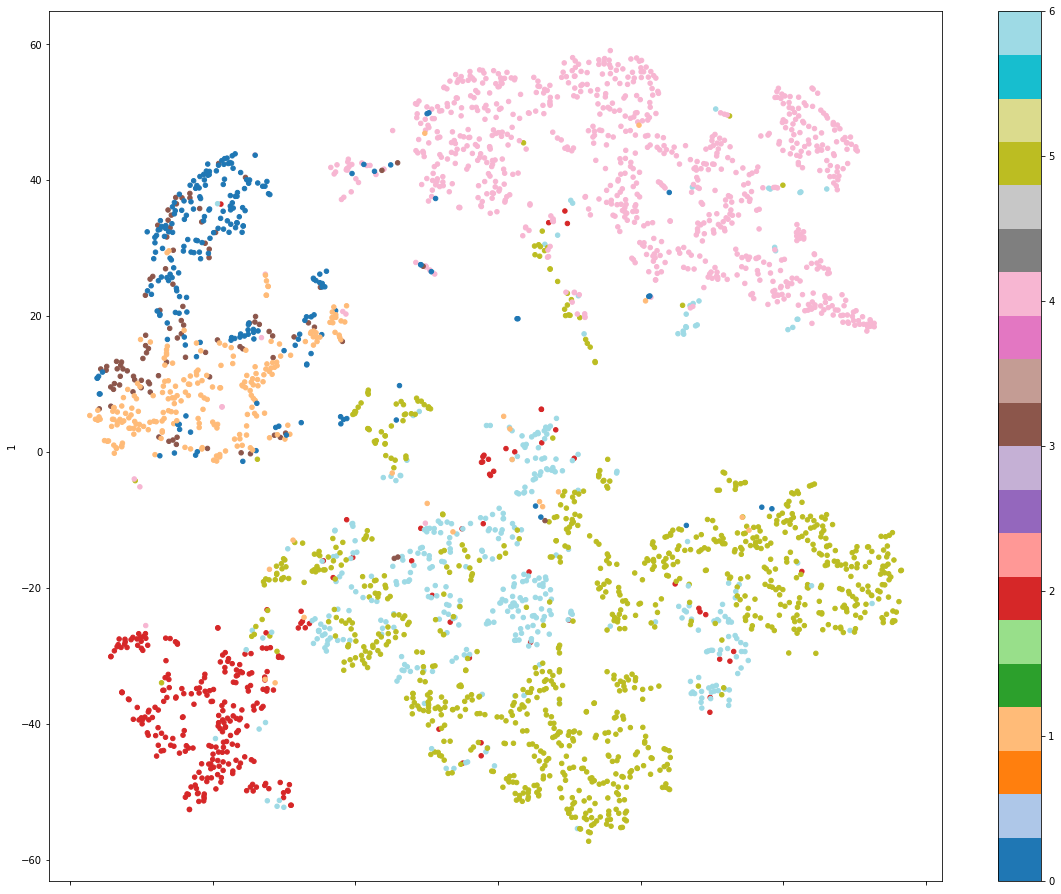

In [270]:
embedding_df.plot.scatter(x=0, y=1, c=zeisel_meta_df['level1class'].cat.codes, cmap=plt.cm.get_cmap('tab20'), figsize=(20,16))
plt.show()